## Final quiz - time series

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import statsmodels.api as sm

In [75]:
%matplotlib inline

### Task 6

In [76]:
milk = pd.read_csv('monthly-milk-production.csv', sep=';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [77]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [78]:
milk['daily'] = milk.milk / milk.index.days_in_month

In [79]:
milk.head()

,milk,daily
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


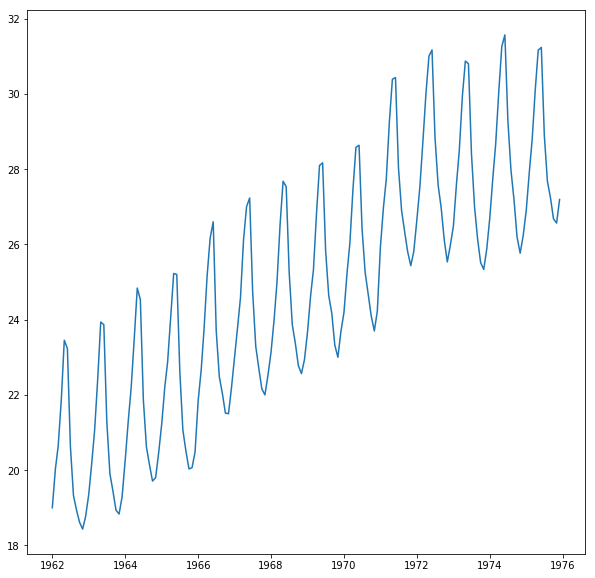

In [80]:
plt.figure(figsize=(10,10))
plt.plot(milk.daily)
plt.show()

### Task 7

In [81]:
result = sm.tsa.stattools.adfuller(milk.daily)
result

(-1.1798216373266057,
 0.68221515130814325,
 12,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.5708067458066353)

In [82]:
milk['daily_diff12'] = milk.daily - milk.daily.shift(12)

In [84]:
milk.head(15)

,milk,daily,daily_diff12
month,,,
1962-01-01,589,19.000000,NaN
1962-02-01,561,20.035714,NaN
1962-03-01,640,20.645161,NaN
1962-04-01,656,21.866667,NaN
1962-05-01,727,23.451613,NaN
1962-06-01,697,23.233333,NaN
1962-07-01,640,20.645161,NaN
1962-08-01,599,19.322581,NaN
1962-09-01,568,18.933333,NaN


In [85]:
result = sm.tsa.stattools.adfuller(milk.daily_diff12[12:])
result

(-2.1594860932888071,
 0.221276726588304,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [86]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1)

In [87]:
milk.head()

,milk,daily,daily_diff12,daily_diff1
month,,,,
1962-01-01,589,19.000000,NaN,NaN
1962-02-01,561,20.035714,NaN,1.035714
1962-03-01,640,20.645161,NaN,0.609447
1962-04-01,656,21.866667,NaN,1.221505
1962-05-01,727,23.451613,NaN,1.584946


In [88]:
result = sm.tsa.stattools.adfuller(milk.daily_diff1[1:])
result

(-2.7594694762289271,
 0.064300546541744441,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.1539973381055688)

In [89]:
milk['daily_diff12_1'] = milk.daily_diff12[12:] - milk.daily_diff12[12:].shift(1)

In [91]:
milk.head(15)

,milk,daily,daily_diff12,daily_diff1,daily_diff12_1
month,,,,,
1962-01-01,589,19.000000,NaN,NaN,NaN
1962-02-01,561,20.035714,NaN,1.035714,NaN
1962-03-01,640,20.645161,NaN,0.609447,NaN
1962-04-01,656,21.866667,NaN,1.221505,NaN
1962-05-01,727,23.451613,NaN,1.584946,NaN
1962-06-01,697,23.233333,NaN,-0.218280,NaN
1962-07-01,640,20.645161,NaN,-2.588172,NaN
1962-08-01,599,19.322581,NaN,-1.322581,NaN
1962-09-01,568,18.933333,NaN,-0.389247,NaN


In [92]:
result = sm.tsa.stattools.adfuller(milk.daily_diff12_1[13:])
result

(-5.4813263347969228,
 2.2808455518037682e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.90513750989237)

### Task 8

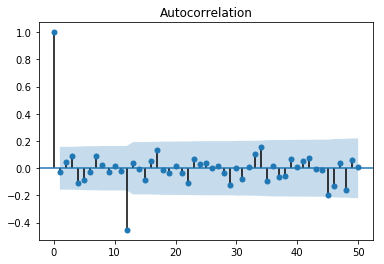

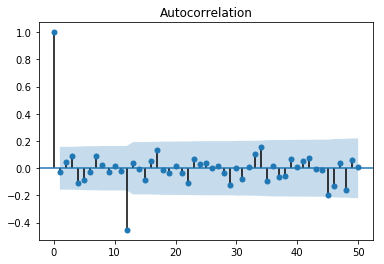

In [95]:
sm.graphics.tsa.plot_acf(milk.daily_diff12_1[13:].values.squeeze(), lags=50)

### Task 9

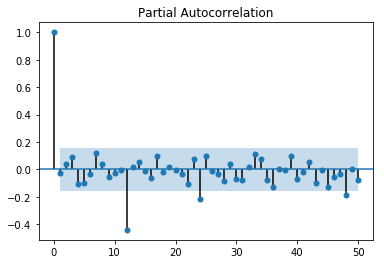

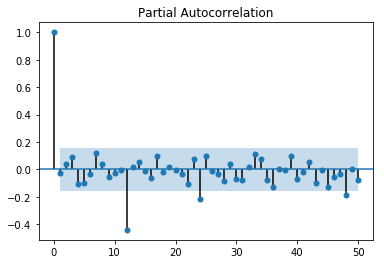

In [96]:
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1[13:].values.squeeze(), lags=50)